## **TAST-2**
## **Anurag Ranjan**
### **Prediction using Unupervised ML**
**Goal:** From the given dataset, predict the optimum number of cluster and represent it visually.

### Importing required modules.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [19]:
pwd

'C:\\Users\\HP'

### Importing Dataset

In [20]:
d = datasets.load_iris()

In [21]:
df = pd.DataFrame(d.data, columns = d.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
d.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Checking for null values

In [23]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [24]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### A simple Box Plotting of the Dataset

<AxesSubplot:>

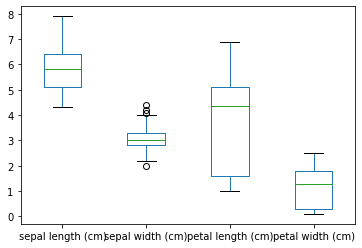

In [25]:
df.plot.box()

### Finding Optimal number of Cluster

In [26]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [27]:
from sklearn.cluster import KMeans

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400,
                   n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

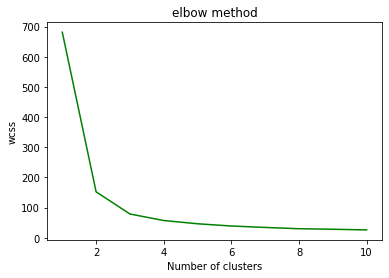

In [29]:
plt.plot(range(1, 11), wcss, color='g')
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

#### Number of clusters is 3 (according to the Plotting-Graph)
The optimum clusters is where the elbow occurs,
when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.


### Training the model with optimal number of cluster

In [30]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300,
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters

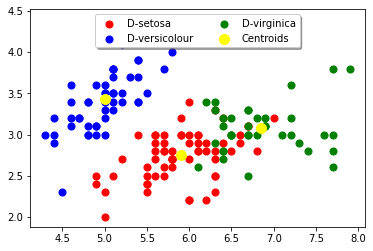

In [31]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans ==0, 1],
           s = 50, c = 'r', label = 'D-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans ==1, 1],
           s = 50, c = 'b', label = 'D-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'g', label = 'D-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)

### Plotting the centroids of the clusters